### Importing Libraries and Rides Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
csv_path = ("rides.csv")
df = pd.read_csv(csv_path, parse_dates = ['Started at','Finished at'])
df.head()

,ID,Vehicle ID,Status,Member,Member ID,Duration,Fare,Started at,Finished at,Member Type,Starting Parking Station Name,End Parking Station Name,Ride Distance,Starting Parking lot id,End Parking lot id
0,23737,28.0,finished,anjum shaik,11154,0:10:53,0,2019-01-13 21:22:00,2019-01-13 21:33:00,casual_user,"Yashodhan Nagar, Vartak Nagar, ठाणे, Thane, Ma...",R-Mall,1.9,NaN,15.0
1,23736,107.0,finished,shruthi d kamath,11689,0:21:58,0,2019-01-13 21:15:00,2019-01-13 21:37:00,casual_user,"Kolse Wadi, Kapur Bawadi, ठाणे, Thane, Maharas...",Highland Park,2.3,NaN,18.0
2,23735,22.0,finished,Ankit THAKUR,13558,0:09:38,0,2019-01-13 21:12:00,2019-01-13 21:22:00,casual_user,"Service Road, Kolse Wadi, Majiwada, ठाणे, Than...","Kolse Wadi, Kapur Bawadi, ठाणे, Thane, Maharas...",3.1,NaN,NaN
3,23734,171.0,finished,Ankit THAKUR,13558,0:01:12,0,2019-01-13 21:10:00,2019-01-13 21:11:00,casual_user,"Dr Kashinath Ghanekar Drama theatre, Gladys Al...","Dr Kashinath Ghanekar Drama theatre, Gladys Al...",0.0,NaN,NaN
4,23733,158.0,finished,asmita kadam,13761,0:24:08,0,2019-01-13 21:07:00,2019-01-13 21:31:00,casual_user,"Kolse Wadi, Kapur Bawadi, ठाणे, Thane, Maharas...",Highland Park,3.6,NaN,18.0


### Information about the Data items

ID,Status,Member ID,Started at,Finished at,Member Type have 0 null values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14003 entries, 0 to 14002
Data columns (total 15 columns):
ID                               14003 non-null int64
Vehicle ID                       13568 non-null float64
Status                           14003 non-null object
Member                           13388 non-null object
Member ID                        14003 non-null int64
Duration                         14002 non-null object
Fare                             14002 non-null float64
Started at                       14003 non-null object
Finished at                      14003 non-null object
Member Type                      14003 non-null object
Starting Parking Station Name    13233 non-null object
End Parking Station Name         13249 non-null object
Ride Distance                    13925 non-null float64
Starting Parking lot id          9678 non-null float64
End Parking lot id               9946 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 1.6+ MB


In [5]:
df.tail()

,ID,Vehicle ID,Status,Member,Member ID,Duration,Fare,Started at,Finished at,Member Type,Starting Parking Station Name,End Parking Station Name,Ride Distance,Starting Parking lot id,End Parking lot id
13998,9735,NaN,finished,Janardhan Mane,7369,00:18:58,0.0,"07:47 AM, 01-09-2018","08:06 AM, 01-09-2018",casual_user,NaN,NaN,2.4,NaN,NaN
13999,9734,NaN,finished,N.R Nakhare,1840,00:22:37,0.0,"07:46 AM, 01-09-2018","08:08 AM, 01-09-2018",casual_user,NaN,NaN,4.8,NaN,NaN
14000,9733,NaN,finished,Janardhan Mane,7369,00:22:28,0.0,"07:24 AM, 01-09-2018","07:46 AM, 01-09-2018",casual_user,NaN,NaN,1.8,NaN,NaN
14001,9732,NaN,finished,Janardhan Mane,7369,00:00:12,0.0,"07:22 AM, 01-09-2018","07:22 AM, 01-09-2018",casual_user,NaN,NaN,0.0,NaN,NaN
14002,9731,NaN,finished,Sanjana Amberkar,3663,00:17:24,0.0,"07:13 AM, 01-09-2018","07:30 AM, 01-09-2018",casual_user,NaN,NaN,1.2,NaN,NaN


#### Looking for Unfinished rides.

In [29]:
df.loc[df.Status != 'finished']

,ID,Vehicle ID,Status,Member,Member ID,Duration,Fare,Started at,Finished at,Member Type,Starting Parking Station Name,End Parking Station Name,Ride Distance,Starting Parking lot id,End Parking lot id
32,23705,237.0,started,SHITAL VIALS RAO RAUT,13755,NaN,NaN,"07:15 PM, 13-01-2019",-,subscribed_user,"Bank of Maharashtra, Mahapalika Bhavan Marg, D...",NaN,NaN,NaN,NaN


#### Checking for rides with duration less than 1 minute

In [102]:
df.loc[df.Duration < '00:01:00']

,ID,Vehicle ID,Status,Member,Member ID,Duration,Fare,Started at,Finished at,Member Type,Starting Parking Station Name,End Parking Station Name,Ride Distance,Starting Parking lot id,End Parking lot id
7,23730,116.0,finished,Harish Nair,7846,00:00:42,0.0,"08:39 PM, 13-01-2019","08:40 PM, 13-01-2019",casual_user,"Pokhran Road 2, Kolse Wadi, Majiwada, ठाणे, Th...","Pokhran Road 2, Kolse Wadi, Majiwada, ठाणे, Th...",0.0,NaN,NaN
8,23729,28.0,finished,yaseen,8435,00:00:15,0.0,"08:33 PM, 13-01-2019","08:33 PM, 13-01-2019",casual_user,"The Origin Fertility Clinic, Gladys Alwares Ro...",Kashinath Ghanekar,0.0,NaN,10.0
10,23727,239.0,finished,Rahul Sonsale,7796,00:00:32,0.0,"08:23 PM, 13-01-2019","08:24 PM, 13-01-2019",casual_user,"Pokhran Road 2, Kolse Wadi, Majiwada, ठाणे, Th...",Tata Sirien,0.0,NaN,6.0
14,23723,64.0,finished,rhea duseja,11609,00:00:21,0.0,"08:05 PM, 13-01-2019","08:05 PM, 13-01-2019",casual_user,"Tulsidham Road, Vartak Nagar, ठाणे, Thane, Mah...","Tulsidham Road, Vartak Nagar, ठाणे, Thane, Mah...",0.0,NaN,NaN
15,23722,64.0,finished,rhea duseja,11609,00:00:21,0.0,"08:03 PM, 13-01-2019","08:04 PM, 13-01-2019",casual_user,Vasant Vihar,Vasant Vihar,0.0,9.0,9.0
17,23720,88.0,finished,Suresh,7950,00:00:15,0.0,"07:58 PM, 13-01-2019","07:59 PM, 13-01-2019",casual_user,"Smt. Sulochanadevi Singhania School, Pokhran R...","Smt. Sulochanadevi Singhania School, Pokhran R...",0.0,NaN,NaN
25,23712,59.0,finished,Suresh,7950,00:00:19,0.0,"07:35 PM, 13-01-2019","07:35 PM, 13-01-2019",casual_user,Singhania School,Singhania School,0.0,3.0,3.0
30,23707,70.0,finished,vikas pandurang kulkarni,13297,00:00:24,0.0,"07:16 PM, 13-01-2019","07:17 PM, 13-01-2019",casual_user,"Brahmand Nagar, ठाणे, Thane, Maharashtra, 4006...",Patlipada,0.0,NaN,12.0
35,23702,153.0,finished,Sandeep Vora,13161,00:00:50,0.0,"07:10 PM, 13-01-2019","07:11 PM, 13-01-2019",casual_user,Vartak Nagar,Vartak Nagar,0.0,2.0,2.0
42,23695,112.0,finished,Madhav Narayan Aarotale,7779,00:00:21,0.0,"06:42 PM, 13-01-2019","06:42 PM, 13-01-2019",casual_user,"Service Road, Dnyaneshwar Nagar, Naupada, ठाणे...","Service Road, Dnyaneshwar Nagar, Naupada, ठाणे...",0.0,NaN,NaN


In [103]:
df['Duration'].loc[df.Duration < '00:01:00'].count()  #6392 rides less than 1 minute

6392

#### Dropping rides with duration less than 1 minute

In [28]:
new_df = df.drop(df[df.Duration < '00:01:00'].index)
new_df.count()

ID                               7611
Vehicle ID                       7205
Status                           7611
Member                           7235
Member ID                        7611
Duration                         7610
Fare                             7610
Started at                       7611
Finished at                      7611
Member Type                      7611
Starting Parking Station Name    7041
End Parking Station Name         7030
Ride Distance                    7539
Starting Parking lot id          5146
End Parking lot id               5321
dtype: int64

In [31]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7611 entries, 0 to 14002
Data columns (total 15 columns):
ID                               7611 non-null int64
Vehicle ID                       7205 non-null float64
Status                           7611 non-null object
Member                           7235 non-null object
Member ID                        7611 non-null int64
Duration                         7610 non-null object
Fare                             7610 non-null float64
Started at                       7611 non-null object
Finished at                      7611 non-null object
Member Type                      7611 non-null object
Starting Parking Station Name    7041 non-null object
End Parking Station Name         7030 non-null object
Ride Distance                    7539 non-null float64
Starting Parking lot id          5146 non-null float64
End Parking lot id               5321 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 951.4+ KB


#### Number of rides missing Starting/Ending Parking Lot ID

In [35]:
new_df.loc[new_df['Starting Parking lot id'].isnull()].count()

ID                               2465
Vehicle ID                       2059
Status                           2465
Member                           2359
Member ID                        2465
Duration                         2464
Fare                             2464
Started at                       2465
Finished at                      2465
Member Type                      2465
Starting Parking Station Name    1895
End Parking Station Name         1931
Ride Distance                    2393
Starting Parking lot id             0
End Parking lot id                708
dtype: int64

#### Rides with Distance 0.0

In [38]:
new_df.loc[new_df['Ride Distance'] == 0]  #1415 Rides with 0.0 Distance

,ID,Vehicle ID,Status,Member,Member ID,Duration,Fare,Started at,Finished at,Member Type,Starting Parking Station Name,End Parking Station Name,Ride Distance,Starting Parking lot id,End Parking lot id
3,23734,171.0,finished,Ankit THAKUR,13558,00:01:12,0.0,"09:10 PM, 13-01-2019","09:11 PM, 13-01-2019",casual_user,"Dr Kashinath Ghanekar Drama theatre, Gladys Al...","Dr Kashinath Ghanekar Drama theatre, Gladys Al...",0.0,NaN,NaN
22,23715,212.0,finished,Syed Muddassir Ahmed,7781,00:01:09,0.0,"07:46 PM, 13-01-2019","07:47 PM, 13-01-2019",casual_user,Vartak Nagar,Vartak Nagar,0.0,2.0,2.0
23,23714,153.0,finished,Syed Muddassir Ahmed,7781,00:02:43,0.0,"07:40 PM, 13-01-2019","07:43 PM, 13-01-2019",casual_user,Vartak Nagar,Vartak Nagar,0.0,2.0,2.0
36,23701,241.0,finished,eknath supadu nemade,12238,03:16:06,85.0,"07:06 PM, 13-01-2019","10:22 PM, 13-01-2019",casual_user,"Eastern Express Highway, Dnyaneshwar Nagar, Na...","Service Road, Dnyaneshwar Nagar, Naupada, ठाणे...",0.0,NaN,NaN
38,23699,107.0,finished,NaN,12874,00:01:33,0.0,"06:55 PM, 13-01-2019","06:56 PM, 13-01-2019",casual_user,"Agra Road, Kolse Wadi, Kapur Bawadi, ठाणे, Tha...","Agra Road, Kolse Wadi, Kapur Bawadi, ठाणे, Tha...",0.0,NaN,NaN
57,23680,106.0,finished,Syed Muddassir Ahmed,7781,00:01:20,0.0,"06:08 PM, 13-01-2019","06:10 PM, 13-01-2019",casual_user,Shivai Nagar,"Upvan Lake Road, Yashodhan Nagar, Shivai Nagar...",0.0,14.0,NaN
61,23676,84.0,finished,Syed Muddassir Ahmed,7781,00:01:04,0.0,"06:02 PM, 13-01-2019","06:03 PM, 13-01-2019",casual_user,Shivai Nagar,Shivai Nagar,0.0,14.0,14.0
68,23669,106.0,finished,Praveen Kumar,7343,00:03:28,0.0,"05:40 PM, 13-01-2019","05:43 PM, 13-01-2019",casual_user,"Upvan Lake Road, Yashodhan Nagar, Shivai Nagar...","Upvan Lake Road, Yashodhan Nagar, Shivai Nagar...",0.0,NaN,NaN
83,23654,209.0,finished,jayesh sanjay gupta,13017,00:08:27,0.0,"04:50 PM, 13-01-2019","04:59 PM, 13-01-2019",subscribed_user,"Kranti Nagar, Thane West, ठाणे, Thane, Maharas...","Kranti Nagar, Thane West, ठाणे, Thane, Maharas...",0.0,NaN,NaN
85,23652,128.0,finished,Praveen Kumar,7343,00:04:19,0.0,"04:34 PM, 13-01-2019","04:38 PM, 13-01-2019",casual_user,ILC Warehouse,ILC Warehouse,0.0,13.0,13.0


In [101]:
new_df.loc[new_df['Ride Distance'] > 76]

,ID,Vehicle ID,Status,Member,Member ID,Duration,Fare,Started at,Finished at,Member Type,Starting Parking Station Name,End Parking Station Name,Ride Distance,Starting Parking lot id,End Parking lot id
3368,20369,243.0,finished,vinod keshav khot,11861,00:21:32,0.0,"07:41 AM, 26-12-2018","08:03 AM, 26-12-2018",subscribed_user,"Someshwarpura, Halsoor, East Zone, Bengaluru, ...",Vartak Nagar,855.20,NaN,2.0
3529,20208,237.0,finished,Madhav Narayan Aarotale,7779,00:04:35,0.0,"01:05 PM, 25-12-2018","01:10 PM, 25-12-2018",casual_user,"Someshwarpura, Halsoor, East Zone, Bengaluru, ...","Yashodhan Nagar, Lokmanya Nagar, ठाणे, Thane, ...",853.40,NaN,NaN
9300,14437,14.0,finished,Yogini Karpe,4064,07:00:07,225.0,"07:52 AM, 25-11-2018","02:52 PM, 25-11-2018",casual_user,Korum Mall,Korum Mall,77.00,4.0,4.0
9604,14133,83.0,finished,Madhav Narayan Aarotale,7779,00:04:04,0.0,"04:11 PM, 23-11-2018","04:15 PM, 23-11-2018",casual_user,ILC Warehouse,ILC Warehouse,1706.80,13.0,13.0
9612,14125,200.0,finished,Madhav Narayan Aarotale,7779,00:04:57,0.0,"03:45 PM, 23-11-2018","03:50 PM, 23-11-2018",casual_user,Vartak Nagar,"Dnyaneshwar Nagar, Vartak Nagar, ठाणे, Thane, ...",1705.80,2.0,NaN
12389,11348,64.0,finished,Aniket,1756,00:04:18,0.0,"04:23 PM, 01-11-2018","04:28 PM, 01-11-2018",casual_user,NaN,ILC Warehouse,853.42,NaN,13.0
12429,11308,194.0,finished,Shubham,8001,00:04:20,0.0,"05:24 PM, 31-10-2018","05:29 PM, 31-10-2018",casual_user,NaN,ILC Warehouse,853.46,NaN,13.0
12431,11306,169.0,finished,Prathmesh,7803,00:09:47,0.0,"05:04 PM, 31-10-2018","05:14 PM, 31-10-2018",casual_user,NaN,NaN,853.39,NaN,NaN
12432,11305,186.0,finished,yaseen,8435,00:05:14,0.0,"02:35 PM, 31-10-2018","02:40 PM, 31-10-2018",casual_user,NaN,ILC Warehouse,853.55,NaN,13.0
12434,11303,189.0,finished,yaseen,8435,00:02:59,0.0,"02:11 PM, 31-10-2018","02:14 PM, 31-10-2018",casual_user,NaN,ILC Warehouse,853.52,NaN,13.0


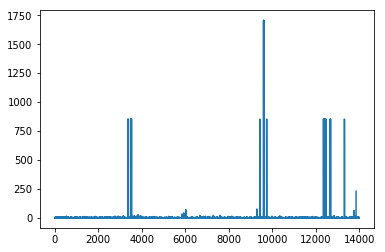

In [113]:
df['Ride Distance'].plot(kind = "line")

In [114]:
df.sort_values(['Ride Distance'],ascending = False)

,ID,Vehicle ID,Status,Member,Member ID,Duration,Fare,Started at,Finished at,Member Type,Starting Parking Station Name,End Parking Station Name,Ride Distance,Starting Parking lot id,End Parking lot id
9604,14133,83.0,finished,Madhav Narayan Aarotale,7779,00:04:04,0.0,"04:11 PM, 23-11-2018","04:15 PM, 23-11-2018",casual_user,ILC Warehouse,ILC Warehouse,1706.80,13.0,13.0
9612,14125,200.0,finished,Madhav Narayan Aarotale,7779,00:04:57,0.0,"03:45 PM, 23-11-2018","03:50 PM, 23-11-2018",casual_user,Vartak Nagar,"Dnyaneshwar Nagar, Vartak Nagar, ठाणे, Thane, ...",1705.80,2.0,NaN
3368,20369,243.0,finished,vinod keshav khot,11861,00:21:32,0.0,"07:41 AM, 26-12-2018","08:03 AM, 26-12-2018",subscribed_user,"Someshwarpura, Halsoor, East Zone, Bengaluru, ...",Vartak Nagar,855.20,NaN,2.0
12669,11068,63.0,finished,Aniket,1756,00:00:16,0.0,"09:58 PM, 25-10-2018","09:58 PM, 25-10-2018",casual_user,NaN,NaN,853.90,NaN,NaN
12667,11070,63.0,finished,Aniket,1756,00:00:30,0.0,"10:00 PM, 25-10-2018","10:00 PM, 25-10-2018",casual_user,NaN,NaN,853.90,NaN,NaN
12432,11305,186.0,finished,yaseen,8435,00:05:14,0.0,"02:35 PM, 31-10-2018","02:40 PM, 31-10-2018",casual_user,NaN,ILC Warehouse,853.55,NaN,13.0
12434,11303,189.0,finished,yaseen,8435,00:02:59,0.0,"02:11 PM, 31-10-2018","02:14 PM, 31-10-2018",casual_user,NaN,ILC Warehouse,853.52,NaN,13.0
3502,20235,122.0,finished,Madhav Narayan Aarotale,7779,00:00:14,0.0,"03:56 PM, 25-12-2018","03:57 PM, 25-12-2018",casual_user,"Someshwarpura, Halsoor, East Zone, Bengaluru, ...","Raptacos Ground, Pu La Deshpande Marg, Yashodh...",853.50,NaN,NaN
12429,11308,194.0,finished,Shubham,8001,00:04:20,0.0,"05:24 PM, 31-10-2018","05:29 PM, 31-10-2018",casual_user,NaN,ILC Warehouse,853.46,NaN,13.0
12439,11298,188.0,finished,yaseen,8435,00:01:25,0.0,"01:36 PM, 31-10-2018","01:37 PM, 31-10-2018",casual_user,NaN,ILC Warehouse,853.44,NaN,13.0


Text(0.5,1,'Histogram')

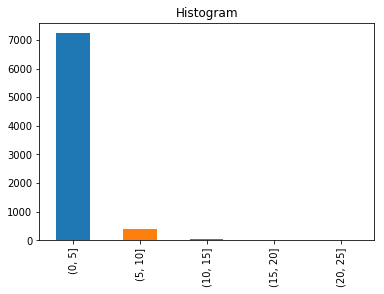

In [20]:
bins = [0,5,10,15,20,25]
rd = pd.cut(df['Ride Distance'],bins)
ax = rd.value_counts().plot.bar()
plt.title("Histogram")


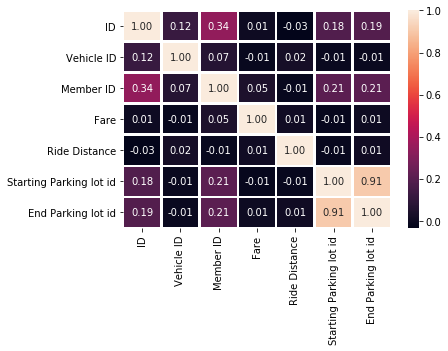

In [4]:
cor = df.corr()
sb.heatmap(cor,annot = True,fmt = '.2f',linewidths = 1.5)
plt.savefig("heat.png")